In [27]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
import tensorflow as tf
import datetime
import numpy as np

In [29]:
from tensorflow import keras
from keras import layers

In [30]:
from tensorflow.keras.datasets import imdb

In [31]:
((train_data, train_labels), (_)) = imdb.load_data(num_words=1000)

In [32]:
def vectorize_sequences(sequences, dimension=10000): # hot encoding
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [33]:
train_data = vectorize_sequences(train_data)

In [34]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [35]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [36]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
history_dropout=model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, callbacks=[tensorboard_callback]
)

Epoch 1/20
30/30 [==============================] - 8s 175ms/step - loss: 0.6548 - accuracy: 0.5977 - val_loss: 0.5682 - val_accuracy: 0.8088
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5721 - accuracy: 0.7246 - val_loss: 0.4818 - val_accuracy: 0.8436
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5111 - accuracy: 0.7778 - val_loss: 0.4290 - val_accuracy: 0.8485
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4561 - accuracy: 0.8153 - val_loss: 0.3919 - val_accuracy: 0.8497
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4223 - accuracy: 0.8358 - val_loss: 0.3779 - val_accuracy: 0.8471
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3952 - accuracy: 0.8489 - val_loss: 0.3548 - val_accuracy: 0.8596
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3794 - accuracy: 0.8561 - val_loss: 0.3417 - val_accuracy: 0.8594
Epoch 8/20
3

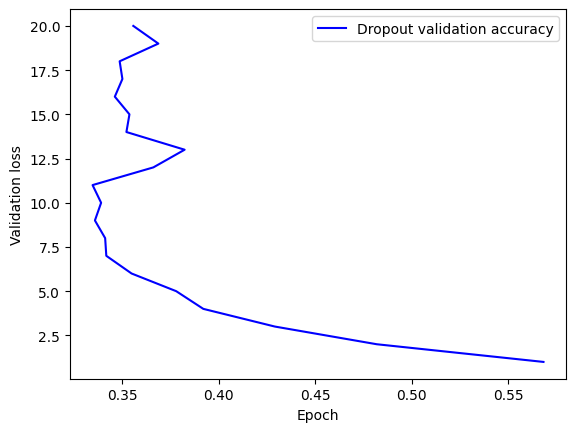

In [42]:
dropout_val_acc=history_dropout.history['val_loss']
epoch=range(1, 21)
import matplotlib.pyplot as plt
plt.plot(dropout_val_acc, epoch, 'b-', label='Dropout validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [40]:
!tensorboard --logdir logs/fit

^C


In [39]:
%tensorboard --logdir logs/fit